In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
import time

In [ ]:
# Chargement et normalisation des données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Conversion des labels en catégories pour CNN
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Affichage de la forme des données
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


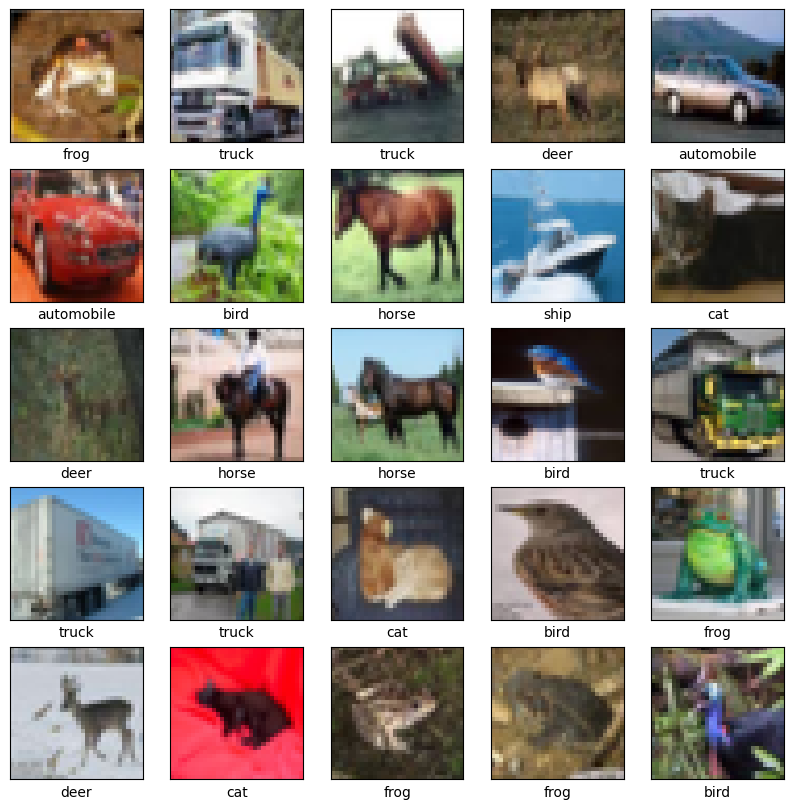

In [ ]:
# Visualisation de quelques images du jeu de données d'entraînement
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i][0])])
plt.show()

In [ ]:
#Évaluation des modèles classiques
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy of {model_name}: {accuracy}")
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    return accuracy

In [ ]:
# Réduction de la dimensionnalité pour les modèles classiques (non CNN)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
# Conversion des labels en 1 dimension pour les modèles classiques
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

Accuracy of Naive Bayes: 0.2976


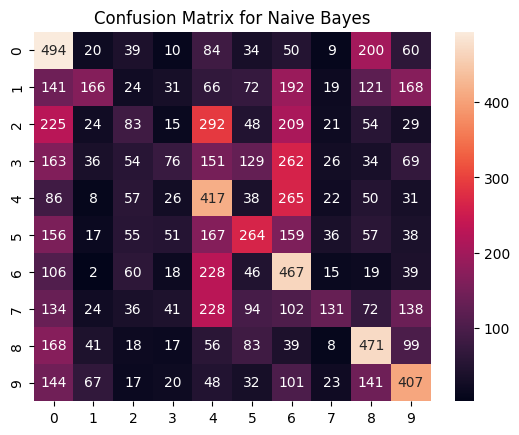

In [ ]:
# Modèles classic et evaluation
#Naive bayes model
nb_model = GaussianNB()
nb_accuracy = evaluate_model(nb_model, x_train_flat, y_train_flat, x_test_flat, y_test_flat, "Naive Bayes")

Accuracy of k-Nearest Neighbors: 0.3398


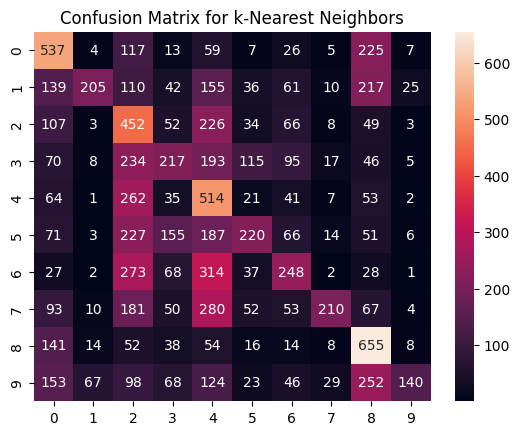

In [ ]:
#KNeighbors
knn_model = KNeighborsClassifier()
knn_accuracy = evaluate_model(knn_model, x_train_flat, y_train_flat, x_test_flat, y_test_flat, "k-Nearest Neighbors")

Accuracy of Decision Tree: 0.2641


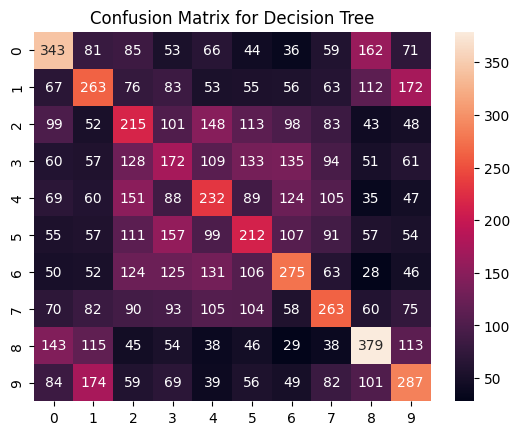

In [ ]:
#decision tree model
dt_model = DecisionTreeClassifier()
dt_accuracy = evaluate_model(dt_model, x_train_flat, y_train_flat, x_test_flat, y_test_flat, "Decision Tree")

Accuracy of Random Forest: 0.4679


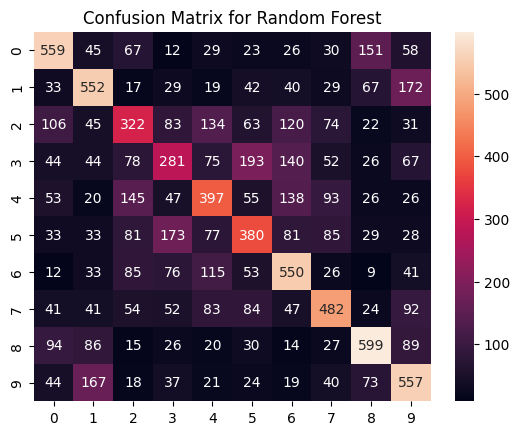

In [ ]:
#model random forest
rf_model = RandomForestClassifier()
rf_accuracy = evaluate_model(rf_model, x_train_flat, y_train_flat, x_test_flat, y_test_flat, "Random Forest")

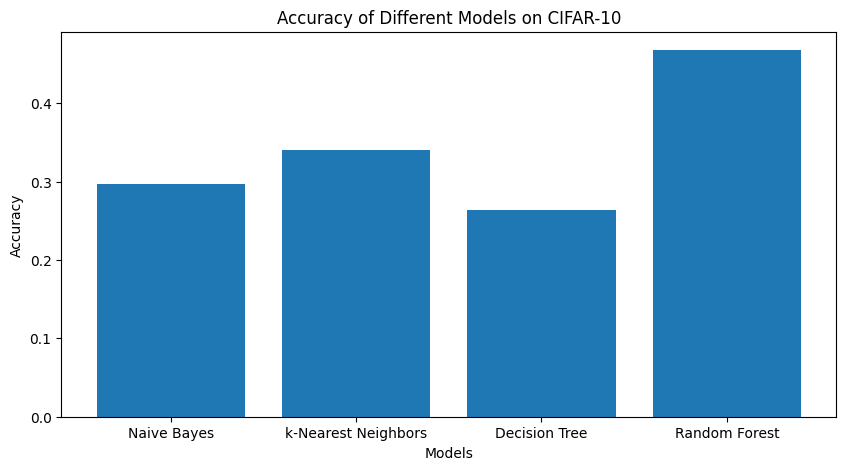

In [ ]:
# Comparaison des précisions
model_names = ["Naive Bayes", "k-Nearest Neighbors", "Decision Tree", "Random Forest"]
accuracies = [nb_accuracy, knn_accuracy, dt_accuracy, rf_accuracy]

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on CIFAR-10')
plt.show()

In [ ]:
#Création et entraînement des modèles CNN
# Création du modèle CNN standard
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Entraînement du modèle CNN
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.7582 - accuracy: 0.3466 - val_loss: 1.3843 - val_accuracy: 0.5063
Epoch 2/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4399 - accuracy: 0.4833 - val_loss: 1.2052 - val_accuracy: 0.5650
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2959 - accuracy: 0.5418 - val_loss: 1.1587 - val_accuracy: 0.5848
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.2016 - accuracy: 0.5801 - val_loss: 1.0476 - val_accuracy: 0.6278
Epoch 5/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.1211 - accuracy: 0.6110 - val_loss: 1.0202 - val_accuracy: 0.6380
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0661 - accuracy: 0.6320 - val_loss: 0.9907 - val_accuracy: 0.6551
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0154 - accuracy: 0.6479 - val_loss: 1.0229 -

In [ ]:
# Chargement de MobileNetV2
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3), weights=None, classes=10)
mobilenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entraînement du modèle MobileNetV2
mobilenet_history = mobilenet_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 359s 209ms/step - loss: 1.9317 - accuracy: 0.2980 - val_loss: 2.3192 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 317s 203ms/step - loss: 1.6082 - accuracy: 0.4226 - val_loss: 2.3249 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 316s 202ms/step - loss: 1.4975 - accuracy: 0.4734 - val_loss: 1.9917 - val_accuracy: 0.2780
Epoch 4/10
1563/1563 [==============================] - 317s 203ms/step - loss: 1.3511 - accuracy: 0.5285 - val_loss: 2.0079 - val_accuracy: 0.4780
Epoch 5/10
1563/1563 [==============================] - 317s 203ms/step - loss: 1.2505 - accuracy: 0.5635 - val_loss: 3.5522 - val_accuracy: 0.3889
Epoch 6/10
1563/1563 [==============================] - 317s 203ms/step - loss: 1.1302 - accuracy: 0.6078 - val_loss: 2.1080 - val_accuracy: 0.5459
Epoch 7/10
1563/1563 [==============================] - 317s 203ms/step - loss: 1.1136 - accuracy: 0.6144 - val_

In [ ]:
from tensorflow.keras import backend as K

# Définir une fonction d'activation personnalisée 'sign'
def sign_activation(x):
    return tf.sign(x)

# Enregistrer la fonction d'activation personnalisée
tf.keras.utils.get_custom_objects().update({'sign': Activation(sign_activation)})

In [ ]:
#Modèle CNN avec poids binaires (BWN)
def binarize_weights(layer):
    weights = layer.get_weights()
    new_weights = [np.sign(weights[0]), weights[1]]
    layer.set_weights(new_weights)
    return layer

# Création du modèle BWN
def create_bwn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), input_shape=input_shape),
        BatchNormalization(),
        Activation('sign'),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3)),
        BatchNormalization(),
        Activation('sign'),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3)),
        BatchNormalization(),
        Activation('sign'),
        Flatten(),

        Dense(64),
        BatchNormalization(),
        Activation('sign'),

        Dense(10, activation='softmax')
    ])

    # Binariser les poids
    for layer in model.layers:
        if isinstance(layer, Conv2D) or isinstance(layer, Dense):
            binarize_weights(layer)

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (32, 32, 3)
bwn_model = create_bwn_model(input_shape)
bwn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_2 (Bat  (None, 13, 13, 64)       

In [ ]:
# Entraînement du modèle BWN
bwn_history = bwn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 76s 47ms/step - loss: 9.2966 - accuracy: 0.1156 - val_loss: 6.4835 - val_accuracy: 0.1469
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 4.6857 - accuracy: 0.1521 - val_loss: 3.1031 - val_accuracy: 0.1788
Epoch 3/10
1563/1563 [==============================] - 74s 48ms/step - loss: 2.4753 - accuracy: 0.1948 - val_loss: 2.1254 - val_accuracy: 0.2296
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 2.1030 - accuracy: 0.2306 - val_loss: 2.0809 - val_accuracy: 0.2422
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 2.0868 - accuracy: 0.2383 - val_loss: 2.0772 - val_accuracy: 0.2441
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 2.0862 - accuracy: 0.2416 - val_loss: 2.0799 - val_accuracy: 0.2416
Epoch 7/10
1563/1563 [==============================] - 73s 46ms/step - loss: 2.0865 - accuracy: 0.2377 - val_loss: 2.0747 -

In [ ]:
#evaluation de model CNN
# Évaluation du modèle CNN standard
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print(f'CNN Test accuracy: {cnn_test_acc}')

313/313 [==============================] - 5s 14ms/step - loss: 0.8998 - accuracy: 0.6866
CNN Test accuracy: 0.6866000294685364


In [ ]:
# Évaluation du modèle MobileNetV2
mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(x_test, y_test)
print(f'MobileNetV2 Test accuracy: {mobilenet_test_acc}')

313/313 [==============================] - 10s 33ms/step - loss: 1.1851 - accuracy: 0.6376
MobileNetV2 Test accuracy: 0.6376000046730042


In [ ]:
# Évaluation du modèle BWN
bwn_test_loss, bwn_test_acc = bwn_model.evaluate(x_test, y_test)
print(f'BWN Test accuracy: {bwn_test_acc}')

313/313 [==============================] - 5s 15ms/step - loss: 2.0722 - accuracy: 0.2482
BWN Test accuracy: 0.24819999933242798


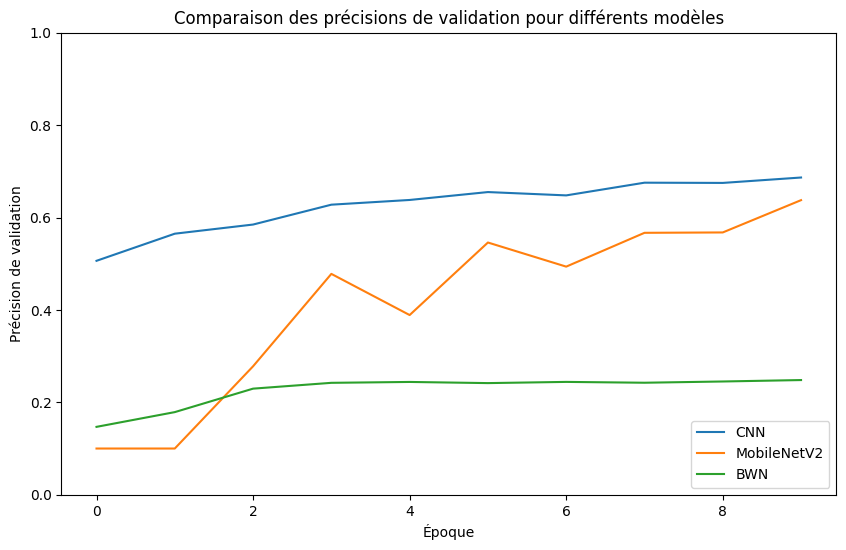

In [ ]:
#Visualisation des performances
# Tracer les graphes de précision
plt.figure(figsize=(10, 6))

# Précision CNN
plt.plot(cnn_history.history['val_accuracy'], label='CNN')

# Précision MobileNetV2
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNetV2')

# Précision BWN
plt.plot(bwn_history.history['val_accuracy'], label='BWN')

# Graphes
plt.xlabel('Époque')
plt.ylabel('Précision de validation')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Comparaison des précisions de validation pour différents modèles')
plt.show()

In [ ]:
#Optimisation pour une faible consommation d'énergie
def convert_to_tflite(model, filename):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    tflite_model = converter.convert()

    # Enregistrer le modèle quantifié
    with open(filename, 'wb') as f:
        f.write(tflite_model)
    return tflite_model

cnn_tflite_model = convert_to_tflite(cnn_model, 'cnn_model_quantized.tflite')
mobilenet_tflite_model = convert_to_tflite(mobilenet_model, 'mobilenet_model_quantized.tflite')
bwn_tflite_model = convert_to_tflite(bwn_model, 'bwn_model_quantized.tflite')

In [ ]:
# Lister les fichiers dans le répertoire courant
!ls

bwn_model_quantized.tflite  mobilenet_model_quantized.tflite
cnn_model_quantized.tflite  sample_data


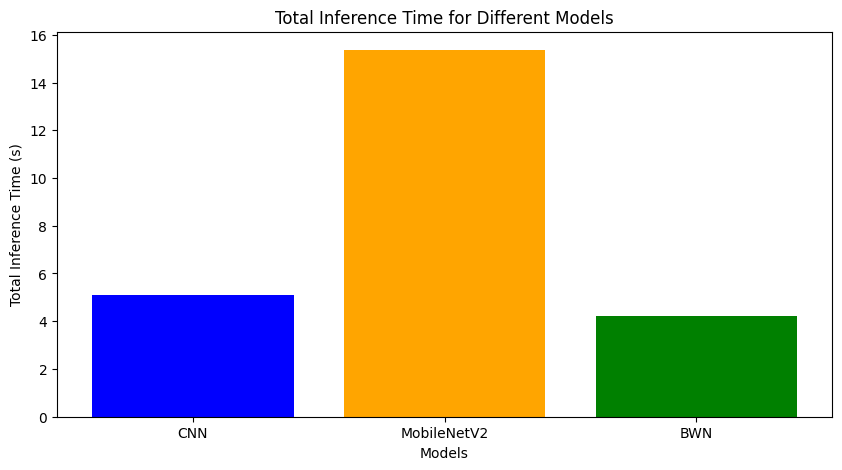

CNN Inference Time: 5.09 seconds
MobileNetV2 Inference Time: 15.36 seconds
BWN Inference Time: 4.24 seconds


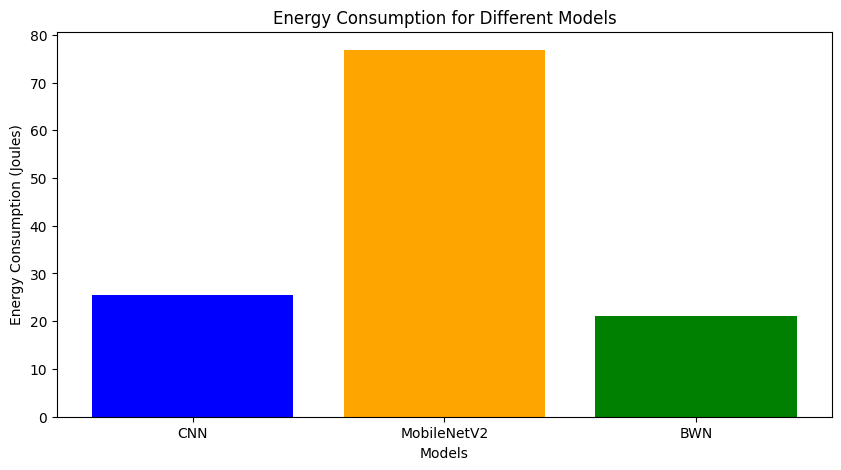

CNN Energy Consumption: 25.45 Joules
MobileNetV2 Energy Consumption: 76.80 Joules
BWN Energy Consumption: 21.19 Joules


In [ ]:
import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour mesurer le temps d'inférence
def measure_inference_time(interpreter, x_test):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    start_time = time.time()

    # Effectuer une prédiction pour chaque image
    for image in x_test:
        image = np.expand_dims(image, axis=0)  # Ajouter une dimension pour le batch
        image = image.astype(np.float32)  # Convertir en float32
        interpreter.set_tensor(input_details[0]['index'], image)
        interpreter.invoke()
        _ = interpreter.get_tensor(output_details[0]['index'])

    end_time = time.time()
    inference_time = end_time - start_time
    return inference_time

# Charger le modèle TensorFlow Lite avec un interprète
def load_tflite_model(model_path):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter

# Charger les modèles TensorFlow Lite
cnn_tflite_path = '/content/cnn_model_quantized.tflite'
mobilenet_tflite_path = '/content/mobilenet_model_quantized.tflite'
bwn_tflite_path = '/content/bwn_model_quantized.tflite'

cnn_tflite_interpreter = load_tflite_model(cnn_tflite_path)
mobilenet_tflite_interpreter = load_tflite_model(mobilenet_tflite_path)
bwn_tflite_interpreter = load_tflite_model(bwn_tflite_path)

# Mesurer le temps d'inférence pour chaque modèle quantifié
cnn_time = measure_inference_time(cnn_tflite_interpreter, x_test)
mobilenet_time = measure_inference_time(mobilenet_tflite_interpreter, x_test)
bwn_time = measure_inference_time(bwn_tflite_interpreter, x_test)

# Afficher les résultats sous forme de tableau
models = ["CNN", "MobileNetV2", "BWN"]
inference_times = [cnn_time, mobilenet_time, bwn_time]

plt.figure(figsize=(10, 5))
plt.bar(models, inference_times, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Total Inference Time (s)')
plt.title('Total Inference Time for Different Models')
plt.show()

# Print the inference times
print(f"CNN Inference Time: {cnn_time:.2f} seconds")
print(f"MobileNetV2 Inference Time: {mobilenet_time:.2f} seconds")
print(f"BWN Inference Time: {bwn_time:.2f} seconds")

# Calculate energy consumption
power_consumption_watts = 5.0  # typical power consumption in watts
cnn_energy = power_consumption_watts * cnn_time
mobilenet_energy = power_consumption_watts * mobilenet_time
bwn_energy = power_consumption_watts * bwn_time

# Display energy consumption results
energy_consumptions = [cnn_energy, mobilenet_energy, bwn_energy]

plt.figure(figsize=(10, 5))
plt.bar(models, energy_consumptions, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Energy Consumption (Joules)')
plt.title('Energy Consumption for Different Models')
plt.show()

# Print the energy consumption
print(f"CNN Energy Consumption: {cnn_energy:.2f} Joules")
print(f"MobileNetV2 Energy Consumption: {mobilenet_energy:.2f} Joules")
print(f"BWN Energy Consumption: {bwn_energy:.2f} Joules")